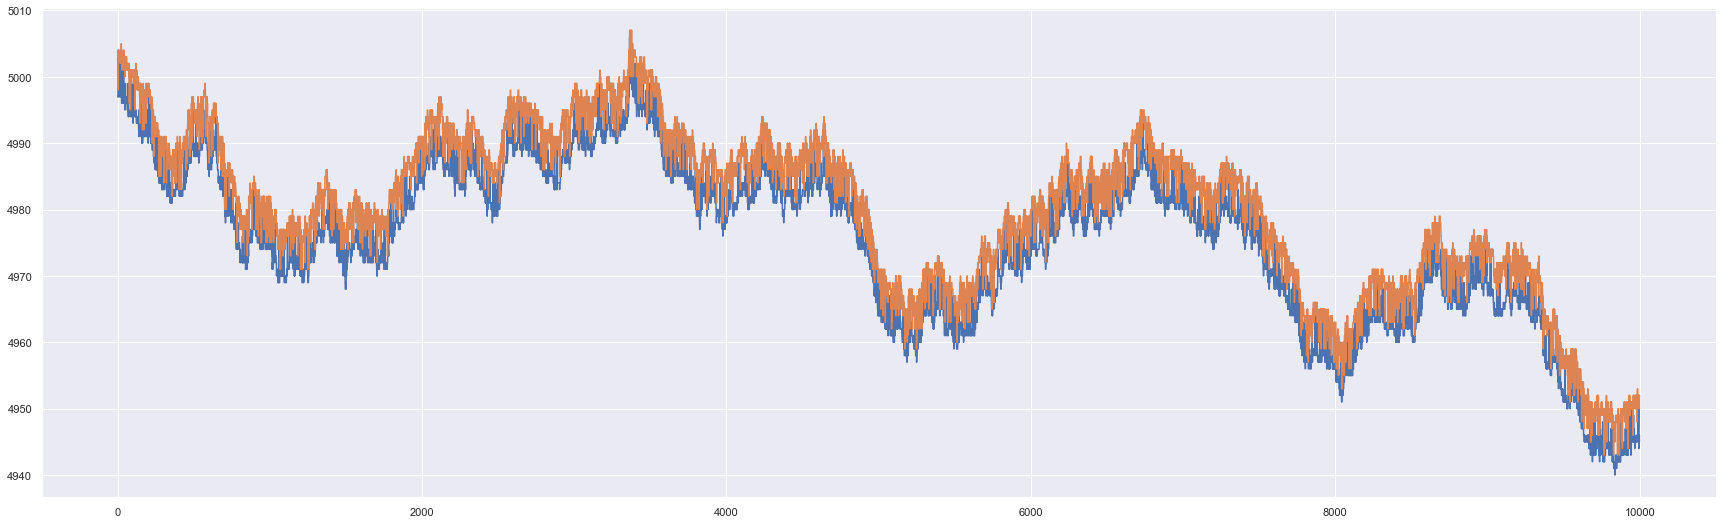

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
day = -2
path = f"island-data-bottle-round-1/prices_round_1_day_{day}.csv"
path_nn = f"island-data-bottle-round-1/trades_round_1_day_{day}_nn.csv"
df = pd.read_csv(path, sep=';')
df_nn = pd.read_csv(path_nn, sep=';')

bananas = df[df['product']=="BANANAS"].reset_index(drop=True)
pearls = df[df['product']=='PEARLS'].reset_index(drop=True)
market = df_nn[df_nn['symbol'] == "BANANAS"].reset_index(
    drop=True).fillna(0)
price = df_nn[df_nn['symbol']=="BANANAS"]['price'].reset_index(drop=True).fillna(0)
qnt = df_nn[df_nn['symbol'] == "BANANAS"]['quantity'].reset_index(drop=True).fillna(0)


bananas['bid_volume'] = bananas['bid_volume_1'] + bananas['bid_volume_2'] + bananas['bid_volume_3']
bananas['ask_volume'] = bananas['ask_volume_1'] + bananas['ask_volume_2'] + bananas['ask_volume_3']



"""
for idx, price in enumerate(bananas['mid_price']):
    if idx == len(bananas['mid_price'][4000:6000])-1: break

    if bananas['bid_volume'][idx]-bananas['ask_volume'][idx] > 0:
        ax.plot([idx, idx+1], bananas['mid_price'][idx:idx+2], c='r')
    elif bananas['bid_volume'][idx]-bananas['ask_volume'][idx] == 0:
        ax.plot([idx, idx+1], bananas['mid_price'][idx:idx+2], c='b')
    else:
        ax.plot([idx, idx+1], bananas['mid_price'][idx:idx+2], c='g')
"""

plt.plot(bananas['bid_price_1'])
plt.plot(bananas['ask_price_1'])
plt.show()



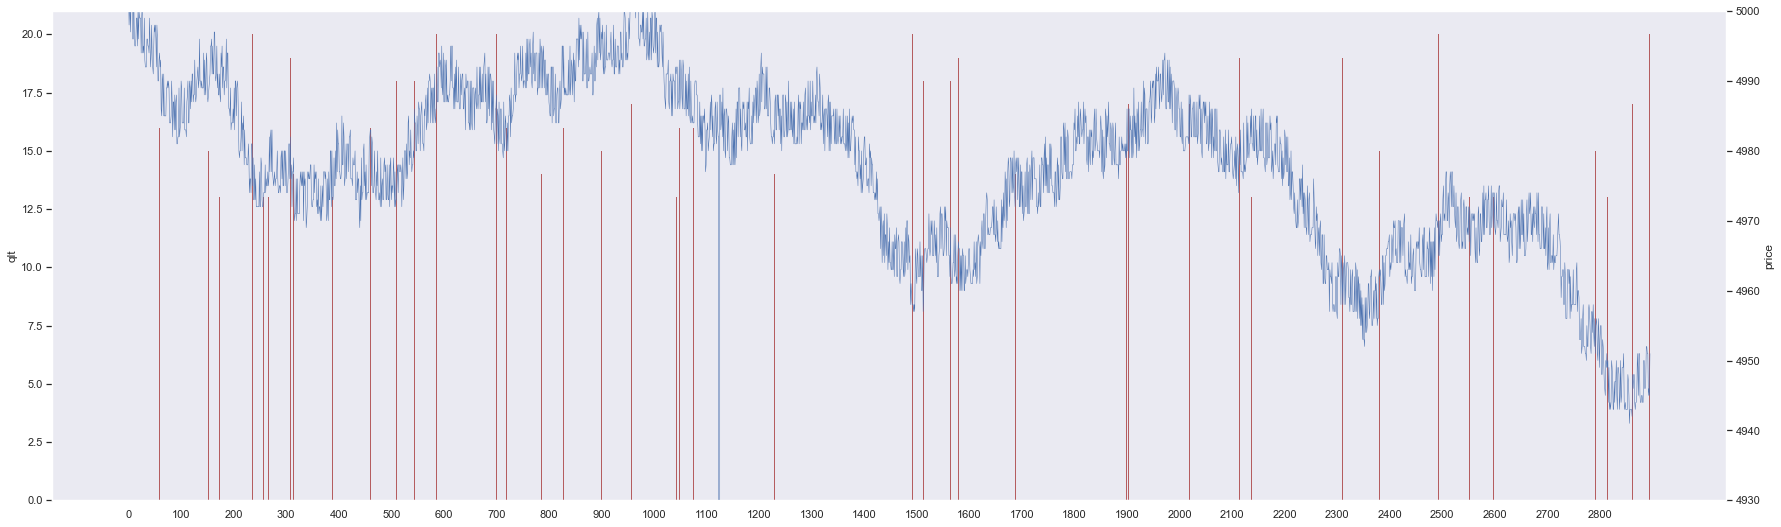

In [22]:
import seaborn as sns
sns.set(rc={'figure.figsize': (30, 9)})
sns.set_theme()

market['qlt'] = np.where(market['quantity']>=12.5, market['quantity'], 0)
ax = sns.barplot(data=market, x=market.index, y='qlt', lw=0., color='r')
ax.set_xticks(range(0, len(market['qlt']), 100))
ax2 = ax.twinx()
sns.lineplot(data=market, x = market.index, y = 'price', ax = ax2, color='b', linewidth=0.5)
ax2.set_ylim(4930,5000)
ax.grid(False)
ax2.grid(False)
plt.savefig('price-volume.png', dpi=300)


In [41]:
bananas['best_ask'] = bananas[['ask_price_1','ask_price_2','ask_price_3']].min(axis=1)
bananas['best_bid'] = bananas[['bid_price_1','bid_price_2','bid_price_3']].max(axis=1)
bananas['spread'] = bananas['best_ask'] - bananas['best_bid']
avg = bananas['spread'].mean()
bananas[bananas['spread']>avg]






,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,bid_volume,ask_volume,best_ask,best_bid,spread
0,-2,0,BANANAS,4997,26,NaN,NaN,NaN,NaN,5003,...,NaN,NaN,NaN,5000.0,0.000000,NaN,NaN,5003.0,4997.0,6.0
2,-2,200,BANANAS,4997,31,NaN,NaN,NaN,NaN,5004,...,NaN,NaN,NaN,5000.5,2.536621,NaN,NaN,5004.0,4997.0,7.0
3,-2,300,BANANAS,4997,27,NaN,NaN,NaN,NaN,5004,...,NaN,NaN,NaN,5000.5,2.405762,NaN,NaN,5004.0,4997.0,7.0
6,-2,600,BANANAS,4997,30,NaN,NaN,NaN,NaN,5004,...,NaN,NaN,NaN,5000.5,2.388672,NaN,NaN,5004.0,4997.0,7.0
7,-2,700,BANANAS,4998,5,4997.0,28.0,NaN,NaN,5004,...,NaN,NaN,NaN,5001.0,2.603516,NaN,NaN,5004.0,4998.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,-2,999100,BANANAS,4945,28,NaN,NaN,NaN,NaN,4951,...,27.0,NaN,NaN,4948.0,219212.000000,NaN,NaN,4951.0,4945.0,6.0
9995,-2,999500,BANANAS,4944,26,NaN,NaN,NaN,NaN,4951,...,NaN,NaN,NaN,4947.5,223680.000000,NaN,NaN,4951.0,4944.0,7.0
9996,-2,999600,BANANAS,4946,6,4945.0,30.0,NaN,NaN,4952,...,NaN,NaN,NaN,4949.0,219260.000000,NaN,NaN,4952.0,4946.0,6.0
9997,-2,999700,BANANAS,4945,22,NaN,NaN,NaN,NaN,4952,...,NaN,NaN,NaN,4948.5,214296.000000,NaN,NaN,4952.0,4945.0,7.0


In [46]:
pearls['best_ask'] = pearls[['ask_price_1',
                               'ask_price_2', 'ask_price_3']].min(axis=1)
pearls['best_bid'] = pearls[['bid_price_1',
                               'bid_price_2', 'bid_price_3']].max(axis=1)
pearls['spread'] = pearls['best_ask'] - pearls['best_bid']
avg = pearls['spread'].mean()
avg
# pearls[pearls['spread'] > avg]


6.7288

In [50]:
import statistics as st
st.variance(bananas['mid_price'][:1000].to_numpy())

52.3230980980981

1.2196705403214796

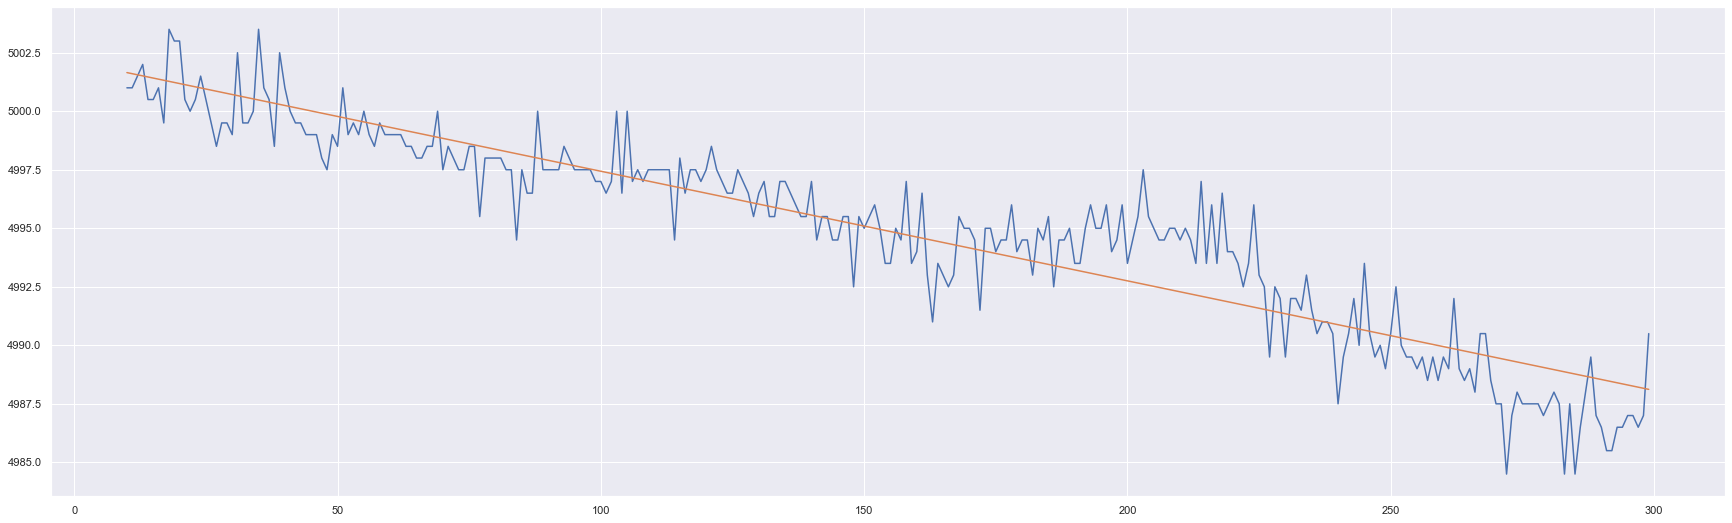

In [76]:
# bananas['mid_price']
y = bananas['mid_price'][10:300]
x = range(10,300)
m, b = np.polyfit(x, y, 1)
plt.plot(x,y)
plt.plot(x, m*x+b)

abs(y-(m*x+b)).mean()

